In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [2]:
train_data = pd.read_csv('../artifacts/train.csv')
test_data = pd.read_csv('../artifacts/test.csv')
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [10]:
train_data.drop_duplicates(inplace=True)
train_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### eda

C:\Users\snirt\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


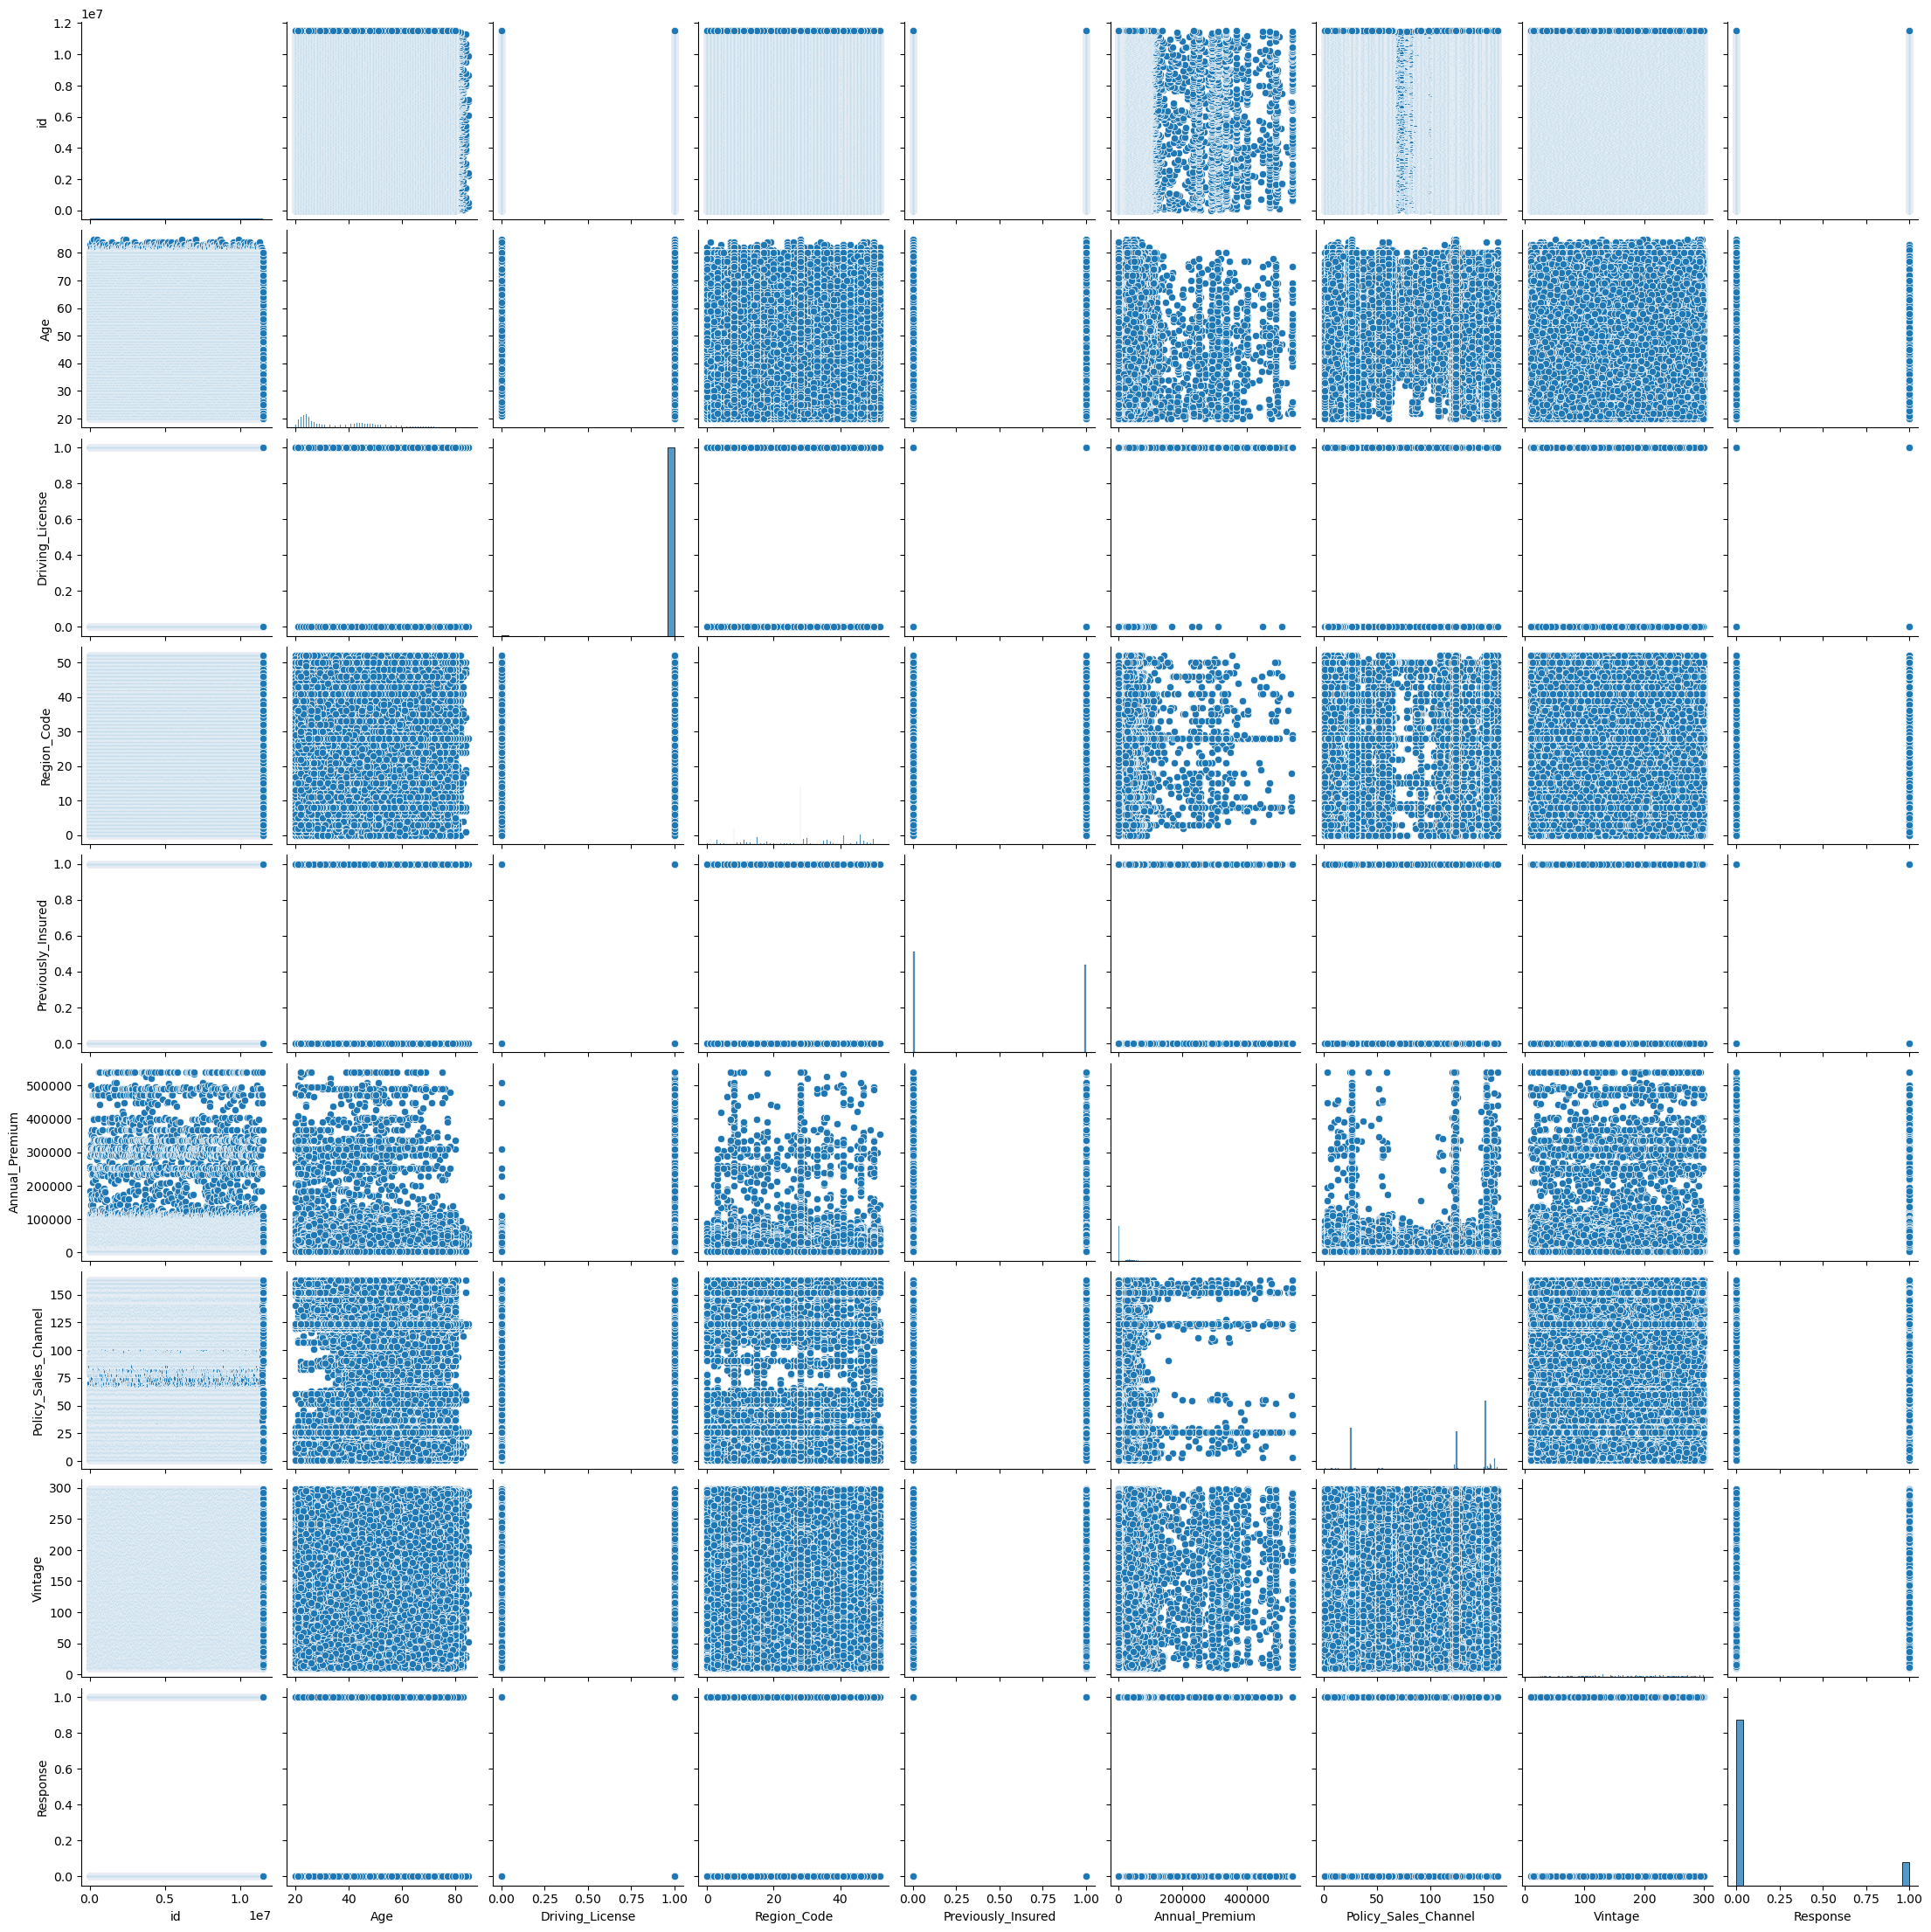

In [11]:
sns.pairplot(train_data)

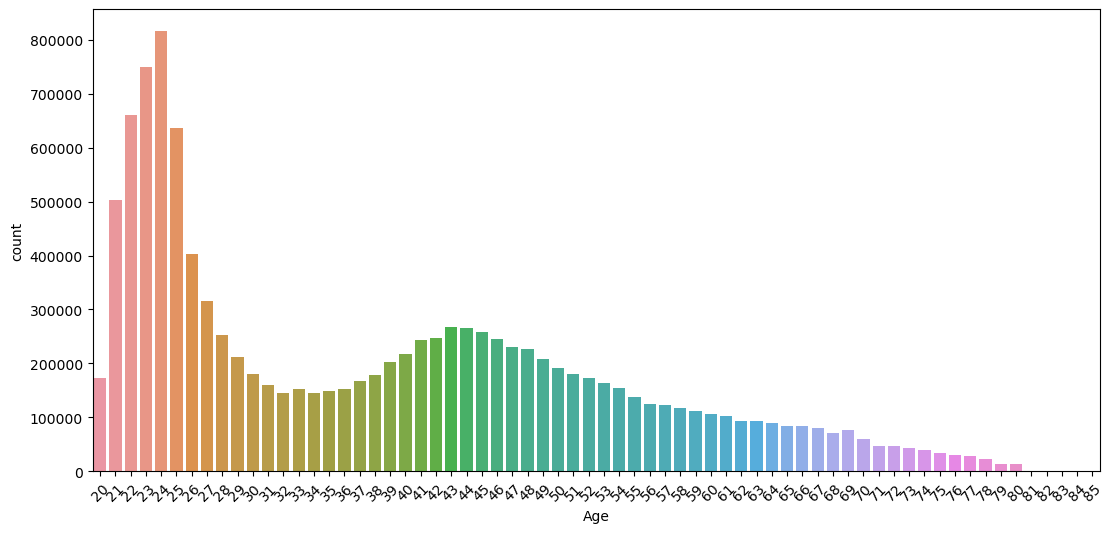

In [27]:
plt.figure(figsize=(13,6))
sns.countplot(x=train_data['Age'])
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Annual_Premium'>

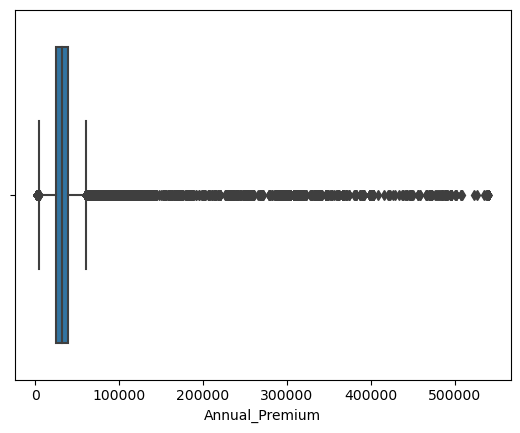

In [32]:
sns.boxplot(x='Annual_Premium', data=train_data)

<Axes: xlabel='Annual_Premium'>

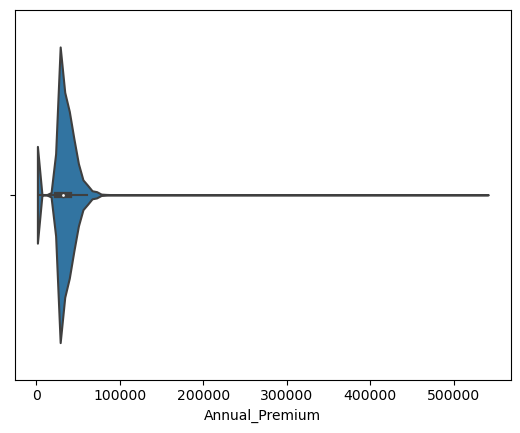

In [33]:
sns.violinplot(x='Annual_Premium', data = train_data)

<Axes: xlabel='Annual_Premium', ylabel='Count'>

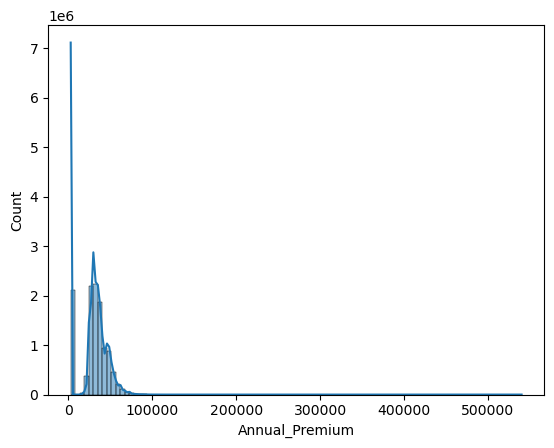

In [38]:
sns.histplot(x='Annual_Premium', data = train_data, kde=True, bins=100)

<Axes: xlabel='Annual_Premium', ylabel='Count'>

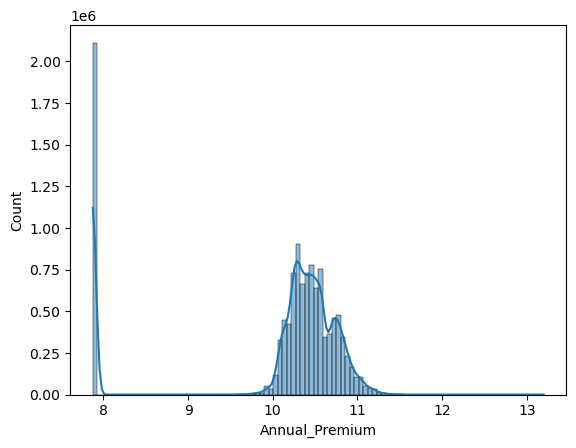

In [39]:
sns.histplot(x=np.log1p(train_data['Annual_Premium']), kde=True, bins=100)

In [46]:
x, _ = stats.boxcox(train_data['Annual_Premium'] + 1)
y = np.log1p(train_data['Annual_Premium'])

In [49]:
def coef_var(x):
    x_bar = np.mean(x)
    x = np.array(x)
    x_var = np.var(x)
    coef = x_var / x_bar
    return coef

In [51]:
coef_var(x), coef_var(y)

(2127.297240722821, 0.10694410876025466)

In [54]:
xy, _ = stats.boxcox(y + 1)

<Axes: ylabel='Count'>

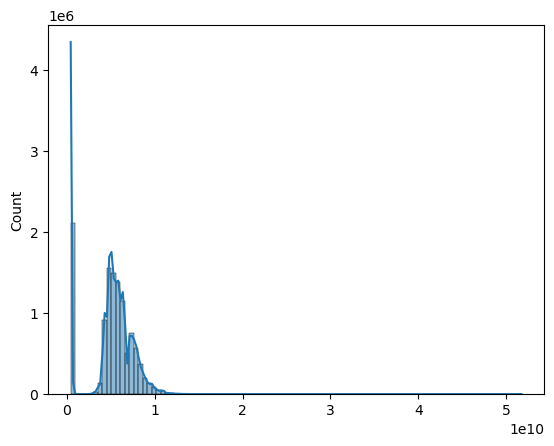

In [55]:
sns.histplot(x=xy, kde=True, bins = 100)

<Axes: title={'center': '25.971500863836482'}, xlabel='Policy_Sales_Channel', ylabel='Count'>

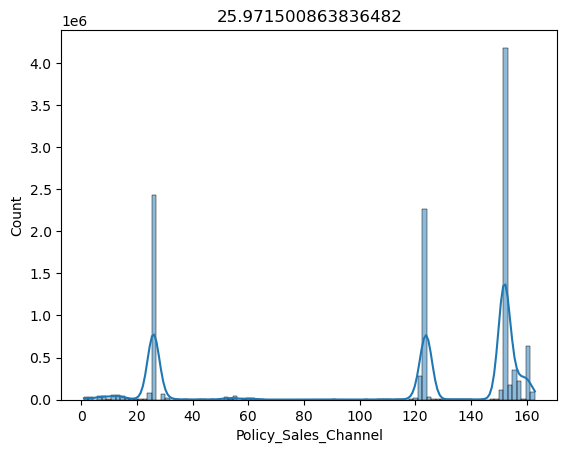

In [59]:
plt.title(coef_var(train_data['Policy_Sales_Channel']))
sns.histplot(x = train_data['Policy_Sales_Channel'], kde=True, bins=100)

<Axes: >

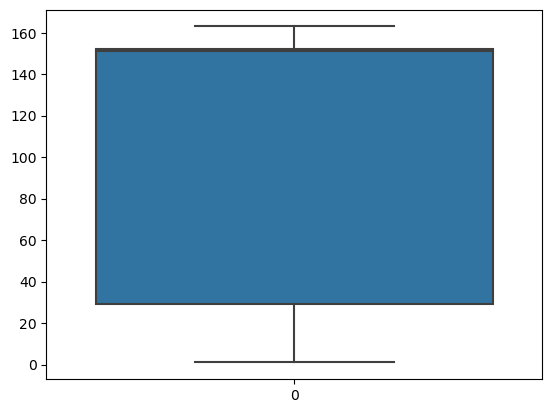

In [61]:
sns.boxplot(train_data['Policy_Sales_Channel'])

In [63]:
corr = train_data.corr(numeric_only=True)

<Axes: >

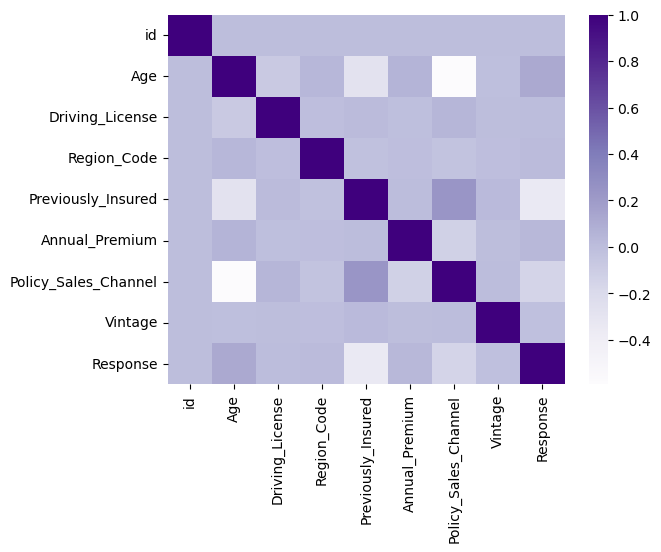

In [72]:
sns.heatmap(corr, cmap='Purples')

<Axes: xlabel='Previously_Insured', ylabel='count'>

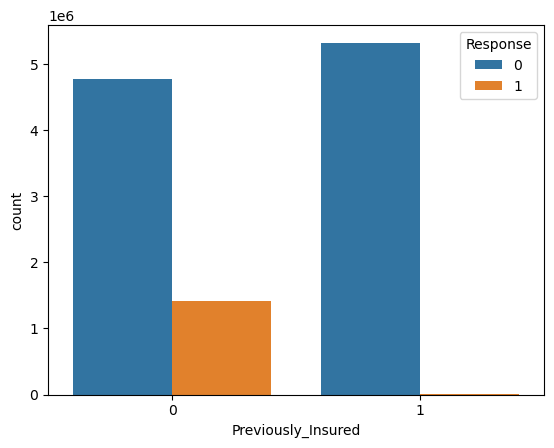

In [77]:
sns.countplot(x=train_data['Previously_Insured'], hue=train_data['Response'])

<Axes: xlabel='Age', ylabel='count'>

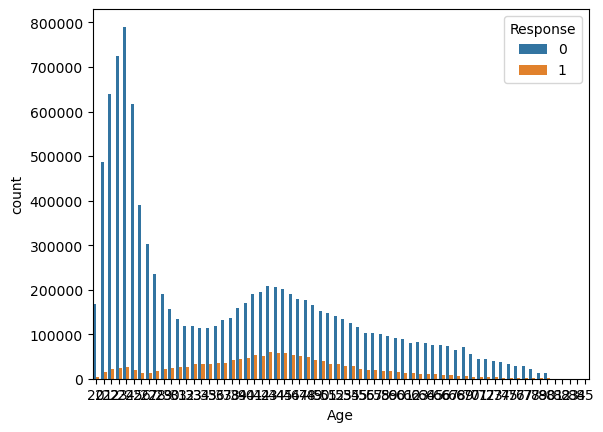

In [79]:
sns.countplot(x=train_data['Age'], hue=train_data['Response'])

In [84]:
np.log1p(train_data['Annual_Premium'])

0           11.083711
1           10.983800
2           10.546499
3            7.875119
4           10.371990
              ...    
11504793    10.218773
11504794    10.292484
11504795     7.875119
11504796    10.788164
11504797    10.399890
Name: Annual_Premium, Length: 11504798, dtype: float64